# From Pixels to Patterns: Unsupervised Clustering of Handwritten Digits

## Overview
This notebook demonstrates unsupervised clustering of handwritten digit images using K-means clustering, following dimensionality reduction with Principal Component Analysis (PCA). The Digits dataset contains 1,797 grayscale images of digits (0–9), each represented as a 64-dimensional vector. To improve interpretability and visualization, we first reduce the dimensionality to 2 using PCA.

While the handwritten digits dataset is commonly used for supervised classification tasks and algorithm benchmarking, in this homework, we assume that the digit labels are unknown. Our goal is to group the images into clusters purely based on their pixel features using unsupervised learning techniques.

We explore two methods to determine the optimal number of clusters: the Elbow Method and the Silhouette Score. After selecting the optimal `k`, K-means is applied and the results are visualized in the reduced 2D PCA space.

## Dataset
The dataset is loaded from `sklearn.datasets.load_digits()`. Each image is represented by 64 features (8x8 pixels), with values ranging from 0 to 16. PCA reduces the data to 2 dimensions for visualization.

## Task
Write a Python script in this notebook that performs the following steps:
1. **Load the Dataset**: Load the Digits dataset from `scikit-learn`.
2. **Preprocessing with PCA**: Apply PCA to reduce the 64-dimensional data to 2 dimensions for clustering and visualization.
3. **Determine Optimal Clusters**: Use the Elbow Method and the Silhouette Score to find the optimal number of clusters (`k`) for K-means clustering.
4. **Apply K-means Clustering**: Fit a K-means model to the 2D data using the optimal `k` you determined. Assign each digit to a cluster.
5. **Visualize the Results**: First apply PCA to reduce the dimantionality of samples from 64 to 2 dimentions. Next, create a scatter plot of the 2D data, with points colored by cluster and centroids marked. Label axes as PCA Component 1 and PCA Component 2.

## Requirements
- Use Python with the libraries: `pandas`, `numpy`, `matplotlib`, `scikit-learn`.
- Include comments in your code to explain each step.
- Handle potential errors (e.g., missing data) with appropriate checks or assumptions.
- Submit your completed notebook as a `.ipynb` file.

## Starter Code
Below is starter code to help you begin. Complete the missing parts to finish the task.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)

Dataset loaded successfully!


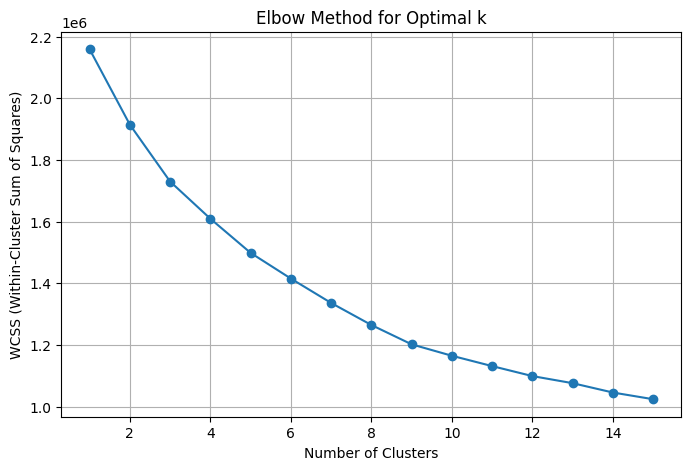

'\nIn this elbow plot, the curve gradually decreases without a very sharp\n"elbow," making it a bit tricky to identify the optimal number of clusters.\nIn such situations, another method like the Silhouette Score might be more\nappropriate.\n'

In [5]:
# Step 1: Load the dataset
digits = load_digits()
X = digits.data  # 64-dimensional data
print("Dataset loaded successfully!")
# YOUR CODE HERE: Print the data shape


# Step 2: Determine optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 16):  # Try k from 1 to 15
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    # YOUR CODE HERE: Fit the model to X
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Record the WCSS

# YOUR CODE HERE: Plot the Elbow Curve (X_axis: number of clusters, and y_axis: WCSS), fig size: 8 by 5
plt.figure(figsize=(8, 5))
plt.plot(range(1, 16), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

'''
In this elbow plot, the curve gradually decreases without a very sharp
"elbow," making it a bit tricky to identify the optimal number of clusters.
In such situations, another method like the Silhouette Score might be more
appropriate.
'''

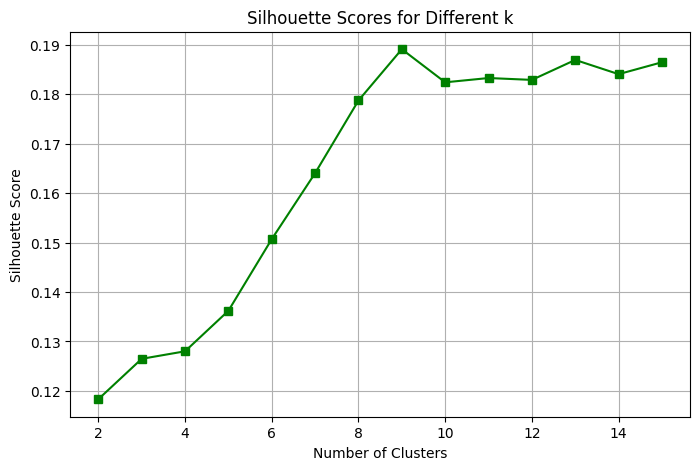

The optimal number of clusters based on silhouette score is: 9
We observe that the number of clusters determined by the Silhouette score, i.e., 9, is quite close to the actual number of clusters, which is 10.


In [7]:
'''
The Silhouette Score is a metric used to evaluate the quality of clustering
results by measuring how well each data point fits within its assigned cluster
compared to other clusters. It ranges from -1 to 1, where a higher value
indicates that the data points are well-matched to their own cluster and poorly
matched to neighboring clusters. After using the Elbow Method—which helps us
estimate the optimal number of clusters by observing the point where adding more
clusters doesn’t significantly reduce the within-cluster sum of squares
(WCSS)—we use the Silhouette Score as a complementary method to validate our
choice. While the Elbow Method relies on visual interpretation and can be
subjective, the Silhouette Score provides a more objective, data-driven
assessment of cluster separation and cohesion. This two-step approach gives us
greater confidence in selecting the best number of clusters for our dataset.
'''

from sklearn.metrics import silhouette_score

# Step 3: Compute silhouette scores for different values of k
silhouette_scores = []
K_range = range(2, 16)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores (X_axis: number of clusters, and y_axis: silhouette_scores), fig size: 8 by 5
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print the best k
optimal_k = K_range[np.argmax(silhouette_scores)] # YOUR CODE HERE: select the number of clusters corresponds to the maximum silhouette_scores. Hint: Use "np.argmax" command

print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")
print(f"We observe that the number of clusters determined by the Silhouette score, i.e., {optimal_k}, is quite close to the actual number of clusters, which is 10.")

In [8]:
# Step 4: 2D Projection via PCA
# Principal Component Analysis (PCA) is applied to reduce the dimensionality of
# the samples from 64 to 2, facilitating the visualization of clusters.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # YOUR CODE HERE: Fit and transform the data with PCA

# Check the new shape
print(f"PCA-transformed data shape: {X_pca.shape}")  # Should be (1797, 2)

# Check for missing values
if np.any(np.isnan(X_pca)):
    print("Warning: PCA-transformed data contains missing values. Consider handling them.")
else:
    print("No missing values in PCA-transformed data.")

PCA-transformed data shape: (1797, 2)
No missing values in PCA-transformed data.


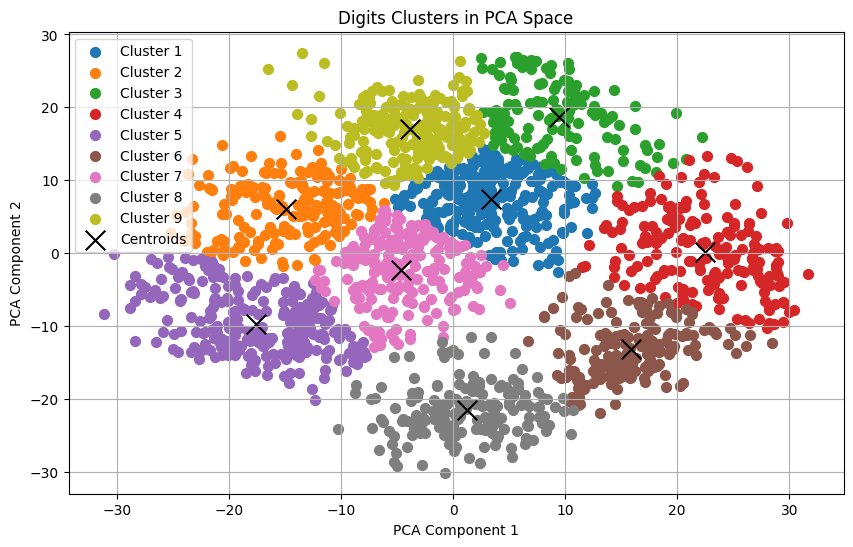

In [9]:
# Step 5: Apply K-means clustering with optimal k
# Initialize and fit KMeans with your chosen optimal_k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42) # YOUR CODE HERE: Fill this in
cluster_labels = kmeans.fit_predict(X_pca) # YOUR CODE HERE: Fit and predict cluster labels using X_pca

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], s=50, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.title('Digits Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
# YOUR CODE HERE: Save the plot
plt.show()

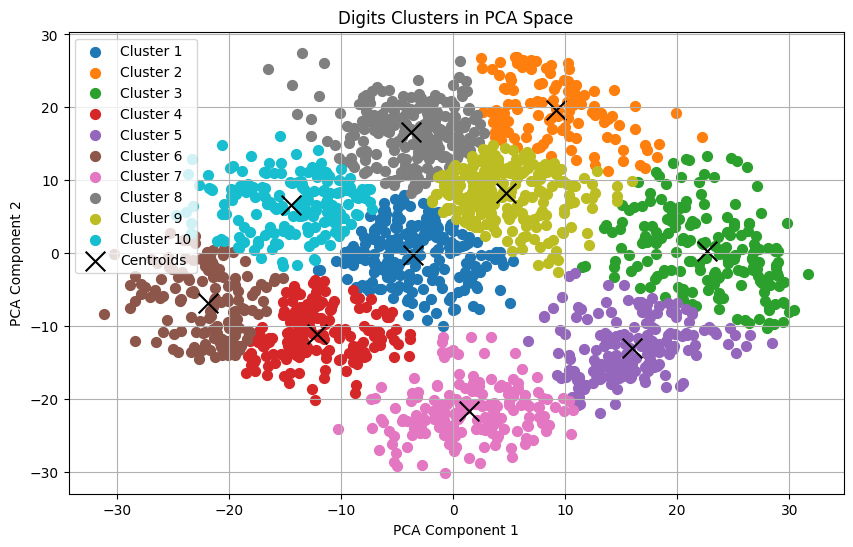

In [10]:
'''
For visual comparison, we plot the clusters using the actual number of clusters (k = 10).
'''
# Step 6: Apply K-Means clustering with the actual number of clusters (k = 10)
# Initialize and fit KMeans with k = 10
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=42) # YOUR CODE HERE: Fill this in
cluster_labels = kmeans.fit_predict(X_pca) # YOUR CODE HERE: Fit and predict cluster labels using X_pca

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], s=50, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.title('Digits Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
# YOUR CODE HERE: Save the plot
plt.show()